# Smooth Quadratic Prediction Markets

In [ ]:
!pip install python-ternary

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
import cvxpy as cp

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from tqdm import tqdm

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    #e_x = np.exp(x - np.max(x))
    b = 1
    e_x = np.exp(x*b)
    return e_x / e_x.sum(axis=0) # only differenced

# Normal (no constraints)

In [ ]:
np.random.seed(1)

#############
n = 3
initial_state = np.array([10,20,10])
belief = np.array([1/6,1/6,2/3])
L = 1
gamma = 2
#############

# Construct the problem.
q = cp.Variable(n)
objective = cp.Minimize( (softmax(initial_state)-belief)@(q-initial_state).T
                 +(L/gamma)*cp.square(cp.norm(q-initial_state, 2)))
prob = cp.Problem(objective)

In [ ]:
states, dist_states = [], []

dist_states.append(softmax(initial_state))

for i in range(3000):
    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    # The optimal value for q is stored in `q.value`.
    #print(str(i)+": ",q.value, softmax(np.array(q.value)),LA.norm(belief-softmax(np.array(q.value))))
    #print(prob.value)
    states.append(q.value)
    dist_states.append(softmax(np.array(q.value)))

    ##################################
    initial_state = q.value
    q = cp.Variable(n)
    objective = cp.Maximize( belief@(q-initial_state).T-
                 (softmax(initial_state)@(q-initial_state).T
                 +(L/gamma)*cp.square(cp.norm(q-initial_state,2))))
    prob = cp.Problem(objective)

dist_states = np.stack(dist_states)

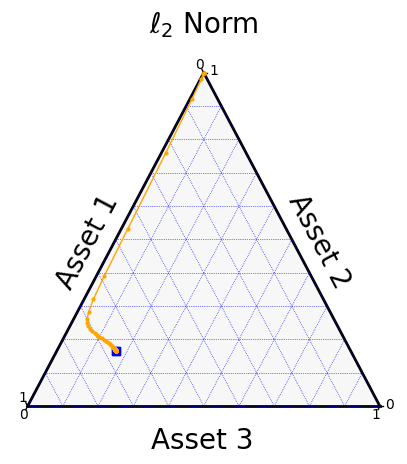

In [ ]:
import ternary
plt.rcParams["figure.figsize"] = (5, 5)

## Sample trajectory plot
figure, tax = ternary.figure(scale=1)

tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=5)
tax.gridlines(color="blue", multiple=.1, linewidth=0.5)

# Set Axis labels and Title
fontsize = 20
tax.set_title("$\ell_{2}$ Norm", fontsize=fontsize, y=1.05)
tax.left_axis_label("Asset 1", fontsize=fontsize)
tax.right_axis_label("Asset 2", fontsize=fontsize)
tax.bottom_axis_label("Asset 3", fontsize=fontsize)

# Set ticks
tax.ticks(axis='lbr', linewidth=1)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


# Belief
tax.line(belief, belief, linewidth=1, marker='s', color='blue', linestyle=":", label="Belief Dist")

# Plot the data
tax.plot(dist_states, linewidth=1.0, label="State Dist Path", marker='o', markersize=2,color='orange')

#tax.legend(loc='lower center', bbox_to_anchor=(1, 0))
ternary.plt.show()

# Buy-Only Market

In [ ]:
np.random.seed(1)

#############
n = 3
initial_state = np.array([10,20,10])
belief = np.array([1/6,1/6,2/3])
L = 1
gamma = 2
#############

# Construct the problem.
q = cp.Variable(n)
objective = cp.Minimize( (softmax(initial_state)-belief)@(q-initial_state).T
                 +(L/gamma)*cp.square(cp.norm(q-initial_state,2)))
constraints = [initial_state[0]-q[0] <= 0,
               initial_state[1]-q[1] <= 0,
               initial_state[2]-q[2] <= 0]
prob = cp.Problem(objective, constraints)

In [ ]:
states, dist_states = [], []

dist_states.append(softmax(initial_state))

for i in range(3000):
    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    # The optimal value for q is stored in `q.value`.
    #print(str(i)+": ",q.value, softmax(np.array(q.value)),LA.norm(belief-softmax(np.array(q.value))))
    #print(prob.value)
    states.append(q.value)
    dist_states.append(softmax(np.array(q.value)))

    ##################################
    initial_state = q.value
    q = cp.Variable(n)
    objective = cp.Maximize( belief@(q-initial_state).T-
                 (softmax(initial_state)@(q-initial_state).T
                 +(L/gamma)*cp.square(cp.norm(q-initial_state,2))))
    constraints = [(initial_state[0]-q[0]) <= 0,
               (initial_state[1]-q[1]) <= 0,
               (initial_state[2]-q[2]) <= 0]
    #prob = cp.Problem(objective)
    prob = cp.Problem(objective, constraints)

dist_states = np.stack(dist_states)

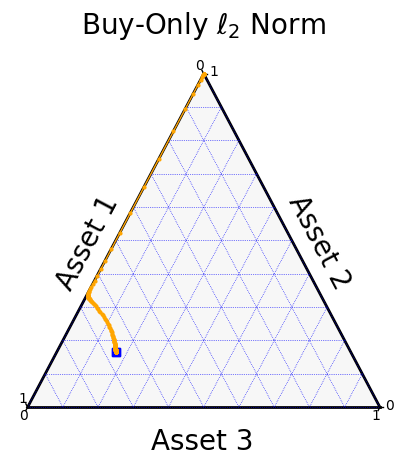

In [ ]:
import ternary
plt.rcParams["figure.figsize"] = (5, 5)

## Sample trajectory plot
figure, tax = ternary.figure(scale=1)

tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=5)
tax.gridlines(color="blue", multiple=.1, linewidth=0.5)

# Set Axis labels and Title
fontsize = 20
tax.set_title("Buy-Only $\ell_{2}$ Norm", fontsize=fontsize, y=1.05)
tax.left_axis_label("Asset 1", fontsize=fontsize)
tax.right_axis_label("Asset 2", fontsize=fontsize)
tax.bottom_axis_label("Asset 3", fontsize=fontsize)

# Set ticks
tax.ticks(axis='lbr', linewidth=1)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


# Belief
tax.line(belief, belief, linewidth=1, marker='s', color='blue', linestyle=":", label="Belief Dist")

# Plot the data
tax.plot(dist_states, linewidth=1.0, label="State Dist Path", marker='o', markersize=2,color='orange')


#tax.legend(loc='lower center', bbox_to_anchor=(1, 0))
ternary.plt.show()

# Bounded Worst-Case Loss with Budget

In [ ]:
np.random.seed(1)

#############
n = 3
initial_state = np.array([10,20,10])
belief = np.array([1/6,1/6,2/3])
budget = .01
L = 1
gamma = 2
#############

# Construct the problem.
q = cp.Variable(n)
objective = cp.Minimize(softmax(initial_state)@(q-initial_state).T
                        +(L/gamma)*cp.square(cp.norm(q-initial_state,2))
                        -belief@(q-initial_state).T)

constraints = [softmax(initial_state)@(q-initial_state).T
              +(L/gamma)*cp.square(cp.norm(q-initial_state,2))
              -np.array([1,0,0])@(q-initial_state).T <= budget,
               softmax(initial_state)@(q-initial_state).T
              +(L/gamma)*cp.square(cp.norm(q-initial_state,2))
              -np.array([0,1,0])@(q-initial_state).T <= budget,
               softmax(initial_state)@(q-initial_state).T
              +(L/gamma)*cp.square(cp.norm(q-initial_state,2))
              -np.array([0,0,1])@(q-initial_state).T <= budget]
prob = cp.Problem(objective, constraints)

In [ ]:
states, dist_states = [], []

dist_states.append(softmax(initial_state))

for i in range(1000):
    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    # The optimal value for q is stored in `q.value`.
    #print(str(i)+": ",q.value, softmax(np.array(q.value)),LA.norm(belief-softmax(np.array(q.value))))
    #print(prob.value)
    states.append(q.value)
    dist_states.append(softmax(np.array(q.value)))

    ##################################
    initial_state = q.value
    q = cp.Variable(n)
    objective = cp.Minimize(softmax(initial_state)@(q-initial_state).T
                        +(L/gamma)*cp.square(cp.norm(q-initial_state,2))
                        -belief@(q-initial_state).T)

    constraints = [softmax(initial_state)@(q-initial_state).T
                  +(L/gamma)*cp.square(cp.norm(q-initial_state,2))
                  -np.array([1,0,0])@(q-initial_state).T <= budget,
                  softmax(initial_state)@(q-initial_state).T
                  +(L/gamma)*cp.square(cp.norm(q-initial_state,2))
                  -np.array([0,1,0])@(q-initial_state).T <= budget,
                  softmax(initial_state)@(q-initial_state).T
                  +(L/gamma)*cp.square(cp.norm(q-initial_state,2))
                  -np.array([0,0,1])@(q-initial_state).T <= budget]

    prob = cp.Problem(objective, constraints)

dist_states = np.stack(dist_states)

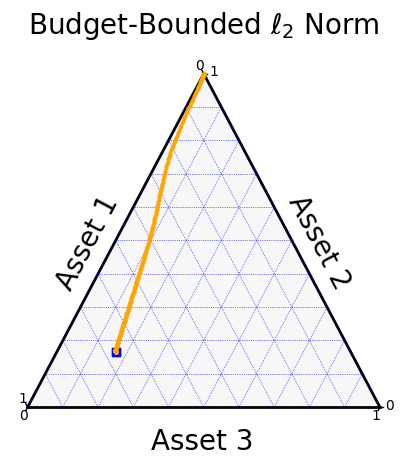

In [ ]:
import ternary
plt.rcParams["figure.figsize"] = (5, 5)

## Sample trajectory plot
figure, tax = ternary.figure(scale=1)

tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=5)
tax.gridlines(color="blue", multiple=.1, linewidth=0.5)

# Set Axis labels and Title
fontsize = 20
tax.set_title("Budget-Bounded $\ell_{2}$ Norm", fontsize=fontsize, y=1.05)
tax.left_axis_label("Asset 1", fontsize=fontsize)
tax.right_axis_label("Asset 2", fontsize=fontsize)
tax.bottom_axis_label("Asset 3", fontsize=fontsize)

# Set ticks
tax.ticks(axis='lbr', linewidth=1)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')


# Belief
tax.line(belief, belief, linewidth=1, marker='s', color='blue', linestyle=":", label="Belief Dist")

# Plot the data
tax.plot(dist_states, linewidth=1.0, label="State Dist Path", marker='o', markersize=2,color='orange')

#tax.legend(loc='lower center', bbox_to_anchor=(1, 0))
ternary.plt.show()